In [1]:
###
# This code taken from towardsai SVM tutorial below:
# https://pub.towardsai.net/support-vector-machine-svm-for-binary-and-multiclass-classification-hands-on-with-scikit-learn-29cdbe5cb90e
#
###

In [20]:
# Import packages
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# import cPickle
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc
import seaborn as sns
from sklearn.svm import LinearSVC
# from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import SGDClassifier 

In [2]:
# Import data
data = pd.read_csv('../data/training/sources/20230404_train/csv/20230404_training_sample.csv')
# Although data are mostly pre-processed, drop nan and convert to binary for classifier
data = data.dropna()
# Reclassify yolo training data to binary
data = data.replace({'class': {10: 0, 11:0, 12:0, 13:0}})

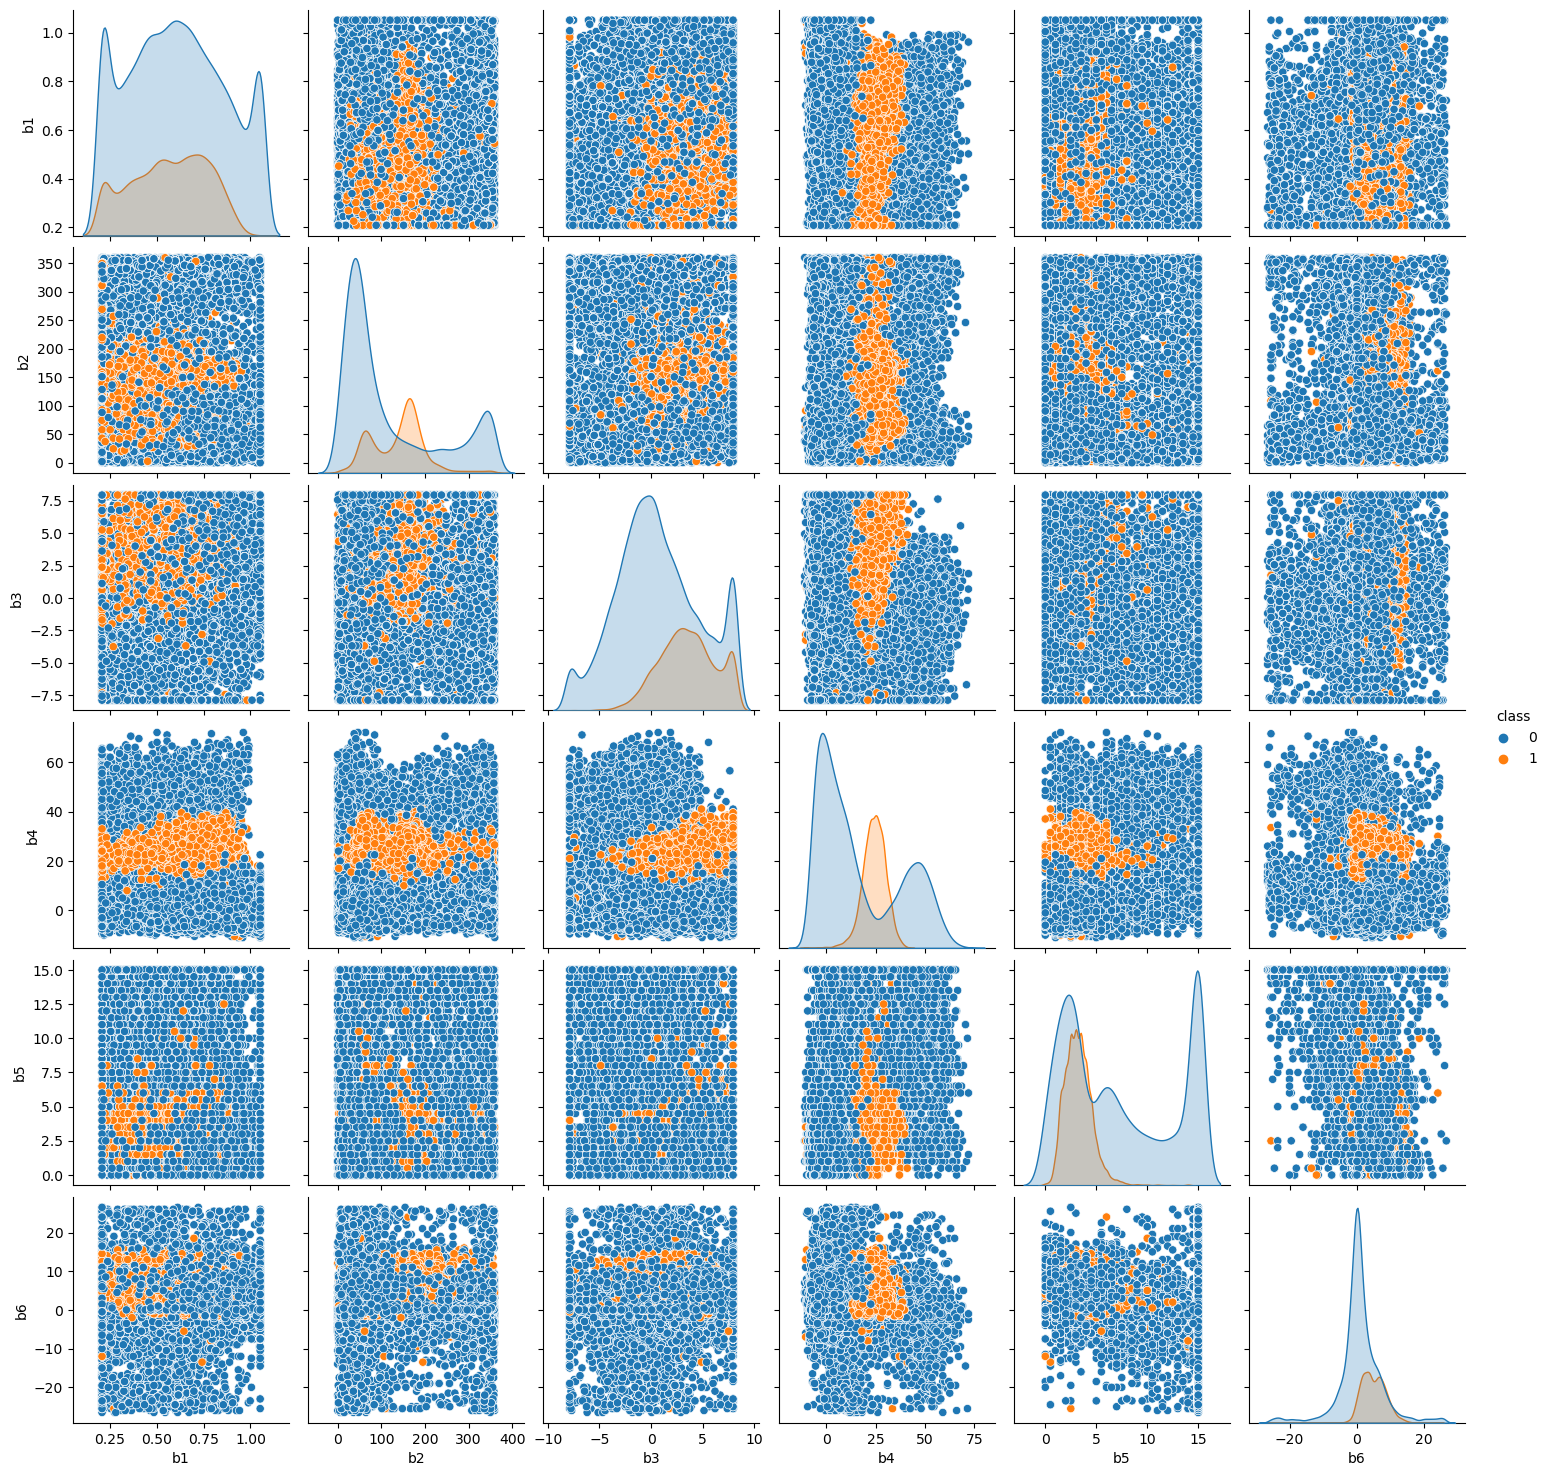

In [3]:
#Exploring dataset:
sns.pairplot(data, kind="scatter", hue="class")
plt.show()

In [4]:
# Separate features and labels
labels = np.array(data['class'])

# Remove the labels from the data
features= data.drop('class', axis = 1)
features= features.drop('date', axis =1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [5]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
train_features = np.array(train_features)
test_features = np.array(test_features)

# normalize data instead of standardize
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_features, batch_size=32)
train_features_norm = normalizer(train_features)
test_features_norm = normalizer(test_features)


2023-05-18 09:22:21.894926: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [7]:
# kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
# def getClassifier(ktype):
#     if ktype == 0:
#         # Polynomial kernal
#         return SVC(kernel='poly', degree=8, gamma="auto")
#     elif ktype == 1:
#         # Radial Basis Function kernal
#         return SVC(kernel='rbf', gamma="auto")
#     elif ktype == 2:
#         # Sigmoid kernal
#         return SVC(kernel='sigmoid', gamma="auto")
#     elif ktype == 3:
#         # Linear kernal
#         return SVC(kernel='linear', gamma="auto")

In [ ]:
# Train different model scenarios
# for i in range(4):
#     # Separate data into test and training sets
#     # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernal
#     svclassifier = getClassifier(i) 
#     svclassifier.fit(train_features, train_labels)# Make prediction
#     y_pred = svclassifier.predict(test_features)# Evaluate our model
#     print("Evaluation:", kernals[i], "kernel")
#     print(classification_report(test_labels,y_pred))

In [14]:
train_features_norm = np.array(train_features_norm)

In [21]:
test_features_norm = np.array(test_features_norm)

In [16]:
# Run hyperparamter tuning
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(train_features_norm, train_labels)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   5.7s
[CV] END .....................C=0.1, gamma=1, k

In [17]:
# test_features_norm = np.array(test_features_norm)
# grid_predictions = grid.predict(test_features_norm)
# print(confusion_matrix(test_labels, grid_predictions))
# print(classification_report(test_labels, grid_predictions))

In [19]:
print(grid.best_estimator_)

SVC(C=1, gamma=1)


In [33]:
model = SVC(kernel='rbf', C=1, gamma=1).fit(train_features_norm, train_labels)


In [37]:

train_preds = model.predict(train_features_norm)
train_targs = train_features_norm 
print("accuracy: ", accuracy_score(train_targs, train_preds))
print("precision: ", precision_score(train_targs, train_preds)) 
print("recall: ", recall_score(train_targs, train_preds))
# print("f1: ", metrics.f1_score(train_targs, train_preds))
print("area under curve (auc): ", roc_auc_score(train_targs, train_preds))
train_preds = train_preds


test_preds = model.predict(test_features_norm)
test_targs = test_features_norm 
print("accuracy: ", accuracy_score(test_targs, test_preds))
print("precision: ", precision_score(test_targs, test_preds)) 
print("recall: ", recall_score(test_targs, test_preds))
# print("f1: ", metrics.f1_score(test_targs, test_preds))
print("area under curve (auc): ", roc_auc_score(test_targs, test_preds))
test_preds = test_preds
 

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [38]:
def evaluate(model, test_features, test_labels):
    # Create our predictions
    predictions = model.predict(test_features)
    cm = confusion_matrix(test_labels, predictions)
    accuracy = accuracy_score(test_labels, predictions)
    f1 = f1_score(test_labels,predictions)
    precision = precision_score(test_labels,predictions)
    recall = recall_score(test_labels,predictions)
    auc = roc_auc_score(test_labels,predictions)
    prc = average_precision_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('AUC: ', auc)
    print('PRC: ', prc)
    return accuracy, precision, recall

In [39]:
random_metrics = evaluate(model, test_features_norm, test_labels)

Model Performance
Accuracy:  0.9866285862650915
Precision:  0.9853971962616822
Recall:  0.9558073654390935
AUC:  0.9757985968320426
PRC:  0.9519758230342474


In [44]:
valid_data = pd.read_csv('/Users/brianlee/Desktop/new_bats/data/training/sources/validation_data/tx/validation_data/combined_validation_data.csv')
valid_data = valid_data.drop('date', axis=1)

In [45]:
valid_data

,cor,pha,dif,ref,spw,vel,training_class
0,0.998333,346.60272,6.9375,-1.5,1.5,9.5,0.0
1,0.811667,286.30865,7.9375,-4.0,1.5,9.5,0.0
2,0.811667,286.30865,7.9375,-4.0,1.0,10.0,0.0
3,1.051667,103.31088,7.9375,-4.5,1.0,10.0,0.0
4,1.051667,103.31088,7.9375,-4.5,2.0,9.0,0.0
...,...,...,...,...,...,...,...
259813,1.051667,137.86537,5.6250,-4.5,0.0,24.5,0.0
259814,0.705000,146.32770,1.5000,-4.5,1.0,6.5,0.0
259815,0.978333,125.52448,7.9375,5.0,1.0,6.5,0.0
259816,0.978333,125.52448,7.9375,-2.0,2.5,5.0,0.0


In [46]:
# Form np arrays of labels and features.
val_labels2 = np.array(valid_data.pop('training_class'))

variables = ['cor', 'pha', 'dif', 'ref', 'spw', 'vel']
val_features2 = np.array(valid_data[variables])
val_features2_norm=normalizer(val_features2)

In [49]:
val_metrics = evaluate(model, val_features2_norm, val_labels2)

Model Performance
Accuracy:  0.9412973696972496
Precision:  0.8770272495266321
Recall:  0.8212179610714974
AUC:  0.8962410262438785
PRC:  0.755936292925459


In [48]:
# Evaluate metrics
train_predictions_baseline2 = model.predict(train_features_norm)
test_predictions_baseline2 = model.predict(val_features2_norm)



def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('No bats (True Negatives): ', cm[0][0])
    print('Bats Incorrectly Detected (False Positives): ', cm[0][1])
    print('Bats Missed (False Negatives): ', cm[1][0])
    print('Bats Detected (True Positives): ', cm[1][1])
    print('Total bat occurrence: ', np.sum(cm[1]))

baseline_results = model.evaluate(val_features2_norm, val_labels2,
                                verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(val_labels2, test_predictions_baseline2)

AttributeError: 'SVC' object has no attribute 'evaluate'

In [8]:
# LinearSVM = LinearSVC().fit(train_features, train_labels)
# # print("training set score: %f" % LinearSVM.score(train_features, train_labels))
# # print("test set score: %f" % LinearSVM.score(test_features, test_labels))

training set score: 0.783798
test set score: 0.780086


/Users/brianlee/miniforge3/envs/doppler_tf/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
# # Tune parameters
# LinearSVM = LinearSVC(C=1, gamma=1).fit(train_features, train_labels)
# print("training set score: %f" % LinearSVM.score(train_features, train_labels))
# print("test set score: %f" % LinearSVM.score(test_features, test_labels))

training set score: 0.856933
test set score: 0.854213


/Users/brianlee/miniforge3/envs/doppler_tf/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
def evaluate(model, test_features, test_labels):
    # Create our predictions
    predictions = model.predict(test_features)
    cm = confusion_matrix(test_labels, predictions)
    accuracy = accuracy_score(test_labels, predictions)
    f1 = f1_score(test_labels,predictions)
    precision = precision_score(test_labels,predictions)
    recall = recall_score(test_labels,predictions)
    auc = roc_auc_score(test_labels,predictions)
    prc = average_precision_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('AUC: ', auc)
    print('PRC: ', prc)
    return accuracy, precision, recall

In [ ]:
# Import independent validation data
valid_data = pd.read_csv('/Users/brianlee/Desktop/new_bats/data/training/sources/validation_data/tx/validation_data/combined_validation_data.csv')
valid_data = valid_data.drop('date', axis=1)
# Form np arrays of labels and features.
val_labels2 = np.array(valid_data.pop('training_class'))

variables = ['cor', 'pha', 'dif', 'ref', 'spw', 'vel']

val_features2 = np.array(valid_data[variables])